# Inicio

### Carga del archivo csv


 Importacion de librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
data1=pd.read_csv('/content/Acciones financieras.csv', delimiter=';')

En esta seccion reacomodaremos el formato asi como filas, columnas y tratamiento de datos faltantes previo a la EDA.


In [ ]:
# Eliminacion de columnas que no son de interes
data = data1.drop(columns=['ENPH_Adj_Close', 'ENPH_Adj_Close.1', 'ENPH_Adj_Close.2', 'ENPH_Adj_Close.3', 'ENPH_Adj_Close.4', 'ENPH_Adj_Close.5', 'ENPH_Adj_Close.6', 'ENPH_Adj_Close.7', 'ENPH_Adj_Close.8', 'ENPH_Adj_Close.9', 'ENPH_Volume', 'ENPH_Volume.1', 'ENPH_Volume.2', 'ENPH_Volume.3', 'ENPH_Volume.4', 'ENPH_Volume.5', 'ENPH_Volume.6', 'ENPH_Volume.7', 'ENPH_Volume.8', 'ENPH_Volume.9',],)


# Eliminar priemr fila correspondiente a la fecha 28.09.2020 dado que tiene valores nulos.
data = data.drop(index=0)

# Convertir la columna Date al formato de fecha
data['Date'] = pd.to_datetime(data['Date'])

# deifinimos la columna fecha como indice, para luego trabajar correctamente en series temporales
data.set_index('Date', inplace=True)

# Verificar los cambios
print(data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2020-09-29 00:00:00+00:00 to 2024-09-25 00:00:00+00:00
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ('INTC_Daily_Return', '')   1004 non-null   float64
 1   ('MSFT_Daily_Return', '')   1004 non-null   float64
 2   ('GOOGL_Daily_Return', '')  1004 non-null   float64
 3   ('AMZN_Daily_Return', '')   1004 non-null   float64
 4   ('GT_Daily_Return', '')     1004 non-null   float64
 5   ('SNOW_Daily_Return', '')   1004 non-null   float64
 6   ('OXY_Daily_Return', '')    1004 non-null   float64
 7   ('TSLA_Daily_Return', '')   1004 non-null   float64
 8   ('ABNB_Daily_Return', '')   952 non-null    float64
 9   ('ENPH_Daily_Return', '')   1004 non-null   float64
dtypes: float64(10)
memory usage: 86.3 KB
None


### Contexto
En el presente proyecto se realizara un modelo ARIMA de ML, util especialmente para series temporales como son los retornos diarios de las acciones. La aplicacion del modelo sera sobre las acciones de Google, ya que es una empresa con gran volumen e historial en la cotizacion en bolsa.

El objetivo es predecir retorno futuros, asi como analizar tendencias y detectar anomalias.


# Exploración y visualización (EDA): conociendo el data set

# Exploracion inicial
El dataset contiene la informacion de los retornos diarios de diferentes acciones, en nuestro caso GOOGL sera de nuestro interes para el rango temporal del dataset, desde finales de septiembre de 2020 hasta finales de septiembre de 2024, con un total de 1004 entradas.


In [ ]:
data.head()
#data.tail()

,"('INTC_Daily_Return', '')","('MSFT_Daily_Return', '')","('GOOGL_Daily_Return', '')","('AMZN_Daily_Return', '')","('GT_Daily_Return', '')","('SNOW_Daily_Return', '')","('OXY_Daily_Return', '')","('TSLA_Daily_Return', '')","('ABNB_Daily_Return', '')","('ENPH_Daily_Return', '')"
Date,,,,,,,,,,
2020-09-29 00:00:00+00:00,-0.00,-0.01,0.01,-0.01,-0.01,0.03,-0.03,-0.01,NaN,0.03
2020-09-30 00:00:00+00:00,0.01,0.01,-0.00,0.00,0.01,-0.03,0.00,0.02,NaN,0.02
2020-10-01 00:00:00+00:00,0.01,0.01,0.02,0.02,0.08,-0.03,-0.03,0.04,NaN,0.08
2020-10-02 00:00:00+00:00,-0.02,-0.03,-0.02,-0.03,0.00,-0.07,0.02,-0.07,NaN,0.01
2020-10-05 00:00:00+00:00,0.01,0.02,0.02,0.02,0.06,0.06,0.06,0.03,NaN,0.08


In [ ]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2020-09-29 00:00:00+00:00 to 2024-09-25 00:00:00+00:00
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ('INTC_Daily_Return', '')   1004 non-null   float64
 1   ('MSFT_Daily_Return', '')   1004 non-null   float64
 2   ('GOOGL_Daily_Return', '')  1004 non-null   float64
 3   ('AMZN_Daily_Return', '')   1004 non-null   float64
 4   ('GT_Daily_Return', '')     1004 non-null   float64
 5   ('SNOW_Daily_Return', '')   1004 non-null   float64
 6   ('OXY_Daily_Return', '')    1004 non-null   float64
 7   ('TSLA_Daily_Return', '')   1004 non-null   float64
 8   ('ABNB_Daily_Return', '')   952 non-null    float64
 9   ('ENPH_Daily_Return', '')   1004 non-null   float64
dtypes: float64(10)
memory usage: 86.3 KB


Index(['('INTC_Daily_Return', '')', '('MSFT_Daily_Return', '')',
       '('GOOGL_Daily_Return', '')', '('AMZN_Daily_Return', '')',
       '('GT_Daily_Return', '')', '('SNOW_Daily_Return', '')',
       '('OXY_Daily_Return', '')', '('TSLA_Daily_Return', '')',
       '('ABNB_Daily_Return', '')', '('ENPH_Daily_Return', '')'],
      dtype='object')

Para este proyecto, utilizaremos las columnas #0 Date para la identificacion temporal y #23 ('GOOGL_Daily_Return', '') para los valores de los retornos diarios de la acccion Google.
En lo que respecta a nuestra variable de interes numerica, vemos que existen 1004 observaciones no nulas por lo que no se evidencian a simple vista gran cantidad de valores faltantes o incompletos.

# Exploración estadistica de los retornos diarios


La media  es de 0,1% lo cual implica que es una accion estable en el tiempo. Su desvio respecto de la media es 2%, lo cual significa una volatilidad baja aunque elevada en terminos relativos, propio de los activos de rent variable.  

In [ ]:
data.describe()

,"('INTC_Daily_Return', '')","('MSFT_Daily_Return', '')","('GOOGL_Daily_Return', '')","('AMZN_Daily_Return', '')","('GT_Daily_Return', '')","('SNOW_Daily_Return', '')","('OXY_Daily_Return', '')","('TSLA_Daily_Return', '')","('ABNB_Daily_Return', '')","('ENPH_Daily_Return', '')"
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.00000,1004.000000,1004.000000,952.000000,1004.000000
mean,-0.000369,0.000847,0.001106,0.000408,0.000618,0.00004,0.002231,0.001345,0.000326,0.001335
std,0.025228,0.016856,0.019680,0.022596,0.033078,0.03922,0.030633,0.037035,0.031560,0.041930
min,-0.260000,-0.080000,-0.100000,-0.140000,-0.270000,-0.18000,-0.110000,-0.120000,-0.130000,-0.260000
25%,-0.010000,-0.010000,-0.010000,-0.010000,-0.020000,-0.02000,-0.010000,-0.020000,-0.020000,-0.020000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.010000,0.010000,0.010000,0.010000,0.020000,0.02000,0.020000,0.020000,0.020000,0.020000
max,0.110000,0.080000,0.100000,0.140000,0.210000,0.23000,0.220000,0.200000,0.130000,0.250000


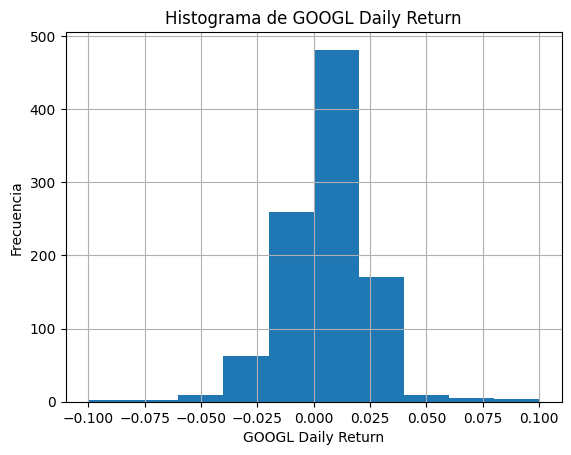

Mediana: 0.0
Media: 0.0011055776892430278
Coeficiente de correlación de Pearson: 0.700755857607852


In [ ]:
# Histograma de la variable 'GOOGL_Daily_Return'
data["('GOOGL_Daily_Return', '')"].hist()
plt.title("Histograma de GOOGL Daily Return")
plt.xlabel("GOOGL Daily Return")
plt.ylabel("Frecuencia")
plt.show()

# Calcular la mediana de la columna
mediana = data["('GOOGL_Daily_Return', '')"].median()
print(f"Mediana: {mediana}")

# Calcular la media de la columna
media = data["('GOOGL_Daily_Return', '')"].mean()
print(f"Media: {media}")

# Calcular el coeficiente de Pearson entre GOOGL y MSFT Daily Returns
correlacion_pearson = data["('GOOGL_Daily_Return', '')"].corr(data["('MSFT_Daily_Return', '')"], method='pearson')

print(f"Coeficiente de correlación de Pearson: {correlacion_pearson}")

La distribucion es positiva asimetrica, con los cual hay mayor frecuencia de retornos por debajo de la media.
Al tener una asimetría positiva, la media es mayor que la mediana y la moda.

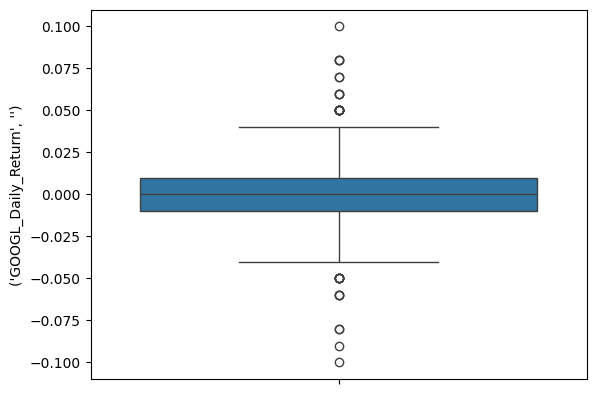

In [ ]:
# Crear un boxplot para la columna ('GOOGL_Daily_Return', '')
sns.boxplot(data=data["('GOOGL_Daily_Return', '')"])

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear una columna 'Year' a partir de la columna 'Date'
data['Year'] = data['Date'].dt.year

KeyError: 'Date'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de líneas con hue para cada año
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y="('GOOGL_Daily_Return', '')", hue='Year', data=data)

# Etiquetas y título
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Google Daily Return Over Time by Year')

# Mostrar el gráfico
plt.show()

ValueError: Could not interpret value `Year` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

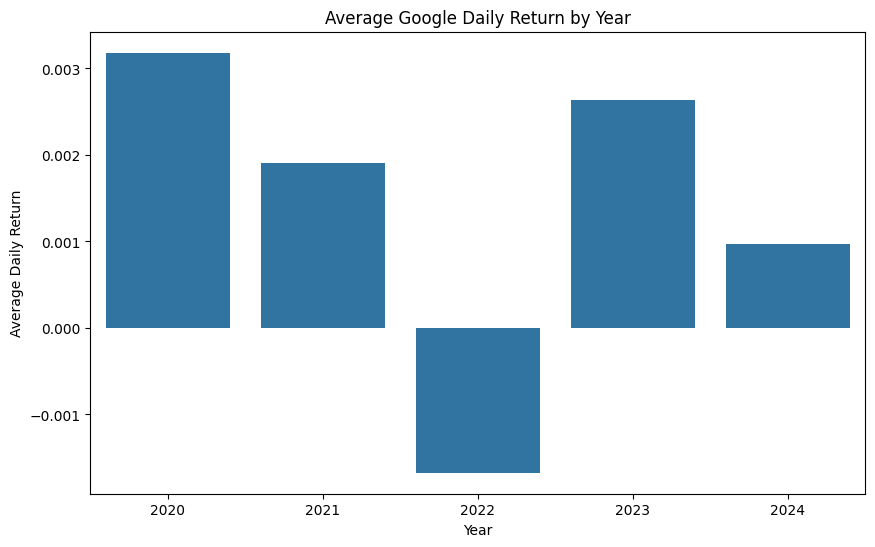

In [ ]:
# Calcular el promedio del retorno diario por año
annual_avg = data.groupby('Year')["('GOOGL_Daily_Return', '')"].mean().reset_index()

# Crear el gráfico de barras para mostrar el promedio de los retornos diarios por año
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y="('GOOGL_Daily_Return', '')", data=annual_avg)

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Average Daily Return')
plt.title('Average Google Daily Return by Year')

# Mostrar el gráfico
plt.show()


# Conclusiones despues de primera exploracion

A partir de la primera exploracion, ordenamiento y limpieza de datos hemos concluido:

*   Tomar como base para el modelo de ML a desarrollar la serie historica de los retornos diarios de la empresa Google.
*   A partir del analisis descriptivo, no se observan grandes impedimentos para utilizar el data set limpio (distribucion asimetrica pero con un comportamiento normal).
*   Utilizar un modelo que funcione con series temporales, como ARIMA.
*   En principio, consideraremos todos los valores historicos (exceptuando NaaN) incluyendo los "outliers" ya que forman parte de los ciclos.
*   Si bien en el 2022 el promedio de retornos fue negativo, contrario a los periodos restantes, y 2020 presento una mayor volatilidad (probablemente debido al COVID) hemos decidido considerar los cinco periodos para tener informacion completa y captar tendencias a lo largo de los años. Posteriormente se considerara separadamente el 2024 para obtener un modelo mas actual (aunque con menos informacion). De esta forma compararemos ambos resultados y decidiremos cual es el mas apropiado.



# Modelo ARIMA de los retornos diarios





### Division del set de entrenamiento y test

In [ ]:
# ordenamos los datos por fecha
data.sort_index(inplace=True)

# Dividimos el dataset en train y test
train_size = int(len(data) * 0.8)  # Usa el 80% de los datos para entrenar
train, test = data.iloc[:train_size], data.iloc[train_size:]

test.tail()
train.describe()

,"('INTC_Daily_Return', '')","('MSFT_Daily_Return', '')","('GOOGL_Daily_Return', '')","('AMZN_Daily_Return', '')","('GT_Daily_Return', '')","('SNOW_Daily_Return', '')","('OXY_Daily_Return', '')","('TSLA_Daily_Return', '')","('ABNB_Daily_Return', '')","('ENPH_Daily_Return', '')"
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,751.000000,803.000000
mean,0.000075,0.000785,0.001046,0.000050,0.001333,0.000585,0.002765,0.001445,0.000386,0.001357
std,0.022884,0.017852,0.020178,0.023724,0.034473,0.041446,0.033564,0.037389,0.033854,0.042474
min,-0.120000,-0.080000,-0.100000,-0.140000,-0.270000,-0.170000,-0.110000,-0.120000,-0.130000,-0.260000
25%,-0.010000,-0.010000,-0.010000,-0.010000,-0.020000,-0.020000,-0.020000,-0.020000,-0.020000,-0.020000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.010000,0.010000,0.010000,0.010000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000
max,0.110000,0.080000,0.080000,0.140000,0.210000,0.230000,0.220000,0.200000,0.130000,0.250000


### Identificar los parámetros del modelo ARIMA (p, d, q)

El modelo ARIMA tiene tres componentes:

p: número de rezagos (lags) de la parte autoregresiva.
d: número de diferencias necesarias para hacer la serie estacionaria.
q: número de rezagos en la parte de media móvil.



*Identificaicon del parametro d*
Orden de integracion d


In [ ]:
#Orden de integracioin adf
from statsmodels.tsa.stattools import adfuller

# Aplicar el test ADF a la columna de retornos
adf_result = adfuller(train["('GOOGL_Daily_Return', '')"],
                  autolag='BIC')

# Imprimir los resultados de ADF
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -28.699691593788017
p-value: 0.0


El p-valor es menor que 0.05, por lo tanto la serie es estacionaria. No necesitamos diferenciar la serie. **Esto implica que el parámetro d = 0.**
Este resultado esta en linea con las propiedades de los restornos diarios en series temporales de activos financieros (a diferencia de los precios que suele ser no estscionarios). Esto avala la eleccion de retornos diarios, y no de precios, para la implementacion del modelo ARIMA

*Identificaion de los parametros p y q*

Para determinar estos parámetros, usamos los gráficos ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function) para identificar valores iniciales.

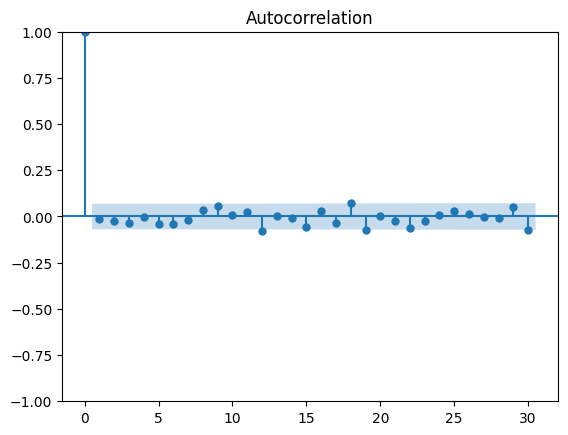

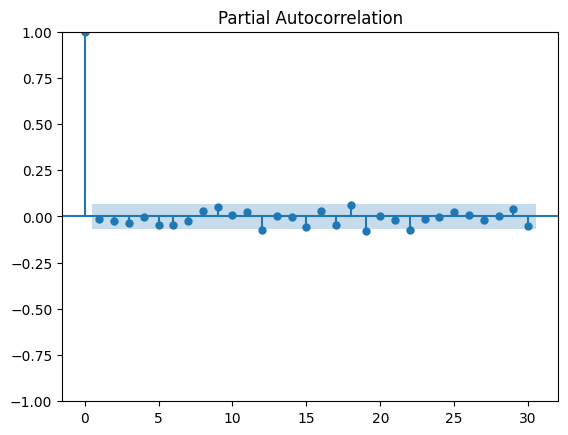

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF
plot_acf(train["('GOOGL_Daily_Return', '')"])
plot_pacf(train["('GOOGL_Daily_Return', '')"])
plt.show()

El gráfico ACF muestra la correlación entre la serie temporal y sus rezagos (lags). En este caso, **q=1**
El gráfico PACF muestra la correlación entre la serie y sus rezagos, eliminando la influencia de los valores intermedios. En este caso, **p=1**

Podemos concluir que nuestro modelo sera **ARIMA(1,0,1)**

### Ajuste del modelo ARIMA

In [ ]:
# Ajustar el modelo ARIMA
model = ARIMA(train["('GOOGL_Daily_Return', '')"], order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                                   SARIMAX Results                                    
Dep. Variable:     ('GOOGL_Daily_Return', '')   No. Observations:                  803
Model:                         ARIMA(1, 0, 1)   Log Likelihood                1995.438
Date:                        Thu, 17 Oct 2024   AIC                          -3982.875
Time:                                09:03:52   BIC                          -3964.122
Sample:                                     0   HQIC                         -3975.672
                                        - 803                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.483      0.138      -0.000       0.002
ar.L1         -0.0075      2.240     -0.003      0.997      -4.397 

Si observamos los resultados del modelo aplicando los parametros seleccionados, el modelo no funciona correctamente dada la significancia de los estadisticos de los parametros. De todas formas procederemos con los pasos de prediccion del conjunto de prueba.

### Predicciones en el conjunto de prueba

In [ ]:
# Realizar predicciones en el conjunto de test
predictions = model_fit.forecast(steps=len(test["('GOOGL_Daily_Return', '')"]))

# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(test["('GOOGL_Daily_Return', '')"], predictions))
print(f'RMSE: {rmse}')

RMSE: 0.017554404855944544


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Si comparamos las media de nuestra variable de 0.1% con el RMSE de 1,8%, llegamos a la conclusion de que el modelo no es aceptable.

Comparacion de valores predichos con valores reales

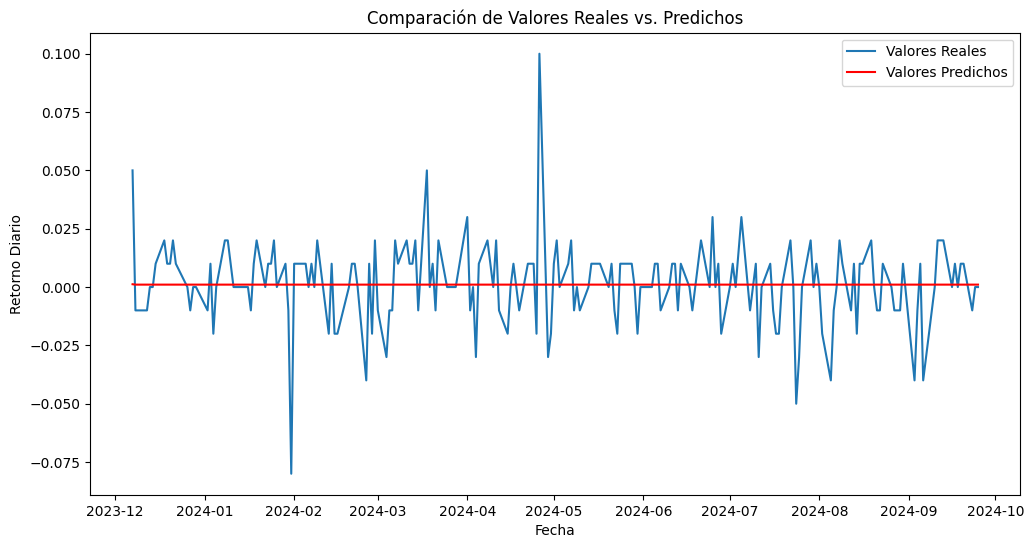

In [ ]:
# prompt: como realizo un grafico con los valores reales y los predichos

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test.index, test["('GOOGL_Daily_Return', '')"], label='Valores Reales')
plt.plot(test.index, predictions, label='Valores Predichos', color='red')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.title('Comparación de Valores Reales vs. Predichos')
plt.legend()
plt.show()


Los valores pedichos son practicamente constantes

### Outliers

Deteccion de outliers por desvio estandar

In [ ]:
# Definir umbral de desviaciones estándar (ajustable)
threshold = 3  # 3 desviaciones estándar

# Obtener media y desviación estándar de los retornos diarios
mean = train["('GOOGL_Daily_Return', '')"].mean()
std = train["('GOOGL_Daily_Return', '')"].std()

# Identificar los outliers (fuera de 3 desviaciones estándar)
outliers = (train["('GOOGL_Daily_Return', '')"] > mean + threshold * std) | \
           (train["('GOOGL_Daily_Return', '')"] < mean - threshold * std)

# Imprimir cuántos outliers se han detectado
print(f'Outliers detectados: {outliers.sum()}')


Outliers detectados: 11


In [ ]:
# Filtrar los datos que NO sean outliers
returns_no_outliers = train["('GOOGL_Daily_Return', '')"][~outliers]

# Verificar cuántos datos han quedado después de eliminar los outliers
print(f'Datos restantes después de eliminar outliers: {len(returns_no_outliers)}')


Datos restantes después de eliminar outliers: 792


MODELO ARIMA SIN OUTLIERS

In [ ]:
# Aplicar el filtro de outliers tanto en el train como en el test
outliers_train = (train["('GOOGL_Daily_Return', '')"] > mean + threshold * std) | \
                 (train["('GOOGL_Daily_Return', '')"] < mean - threshold * std)

outliers_test = (test["('GOOGL_Daily_Return', '')"] > mean + threshold * std) | \
                (test["('GOOGL_Daily_Return', '')"] < mean - threshold * std)

# Filtrar los outliers del train y test
train_no_outliers = train["('GOOGL_Daily_Return', '')"][~outliers_train]
test_no_outliers = test["('GOOGL_Daily_Return', '')"][~outliers_test]

train_no_outliers.describe()


,"('GOOGL_Daily_Return', '')"
count,792.000000
mean,0.001149
std,0.018202
min,-0.050000
25%,-0.010000
50%,-0.000000
75%,0.010000
max,0.060000


In [ ]:
# Ajustar el modelo ARIMA con el conjunto de datos sin outliers
model_no_outliers = ARIMA(train_no_outliers, order=(1, 0, 1))
model_fit_no_outliers = model_no_outliers.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
# Predecir usando el modelo ajustado
predictions_no_outliers = model_fit_no_outliers.forecast(steps=len(test_no_outliers))
predictions_no_outliers.index = test_no_outliers.index  # Asegúrate de que coincidan los índices


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


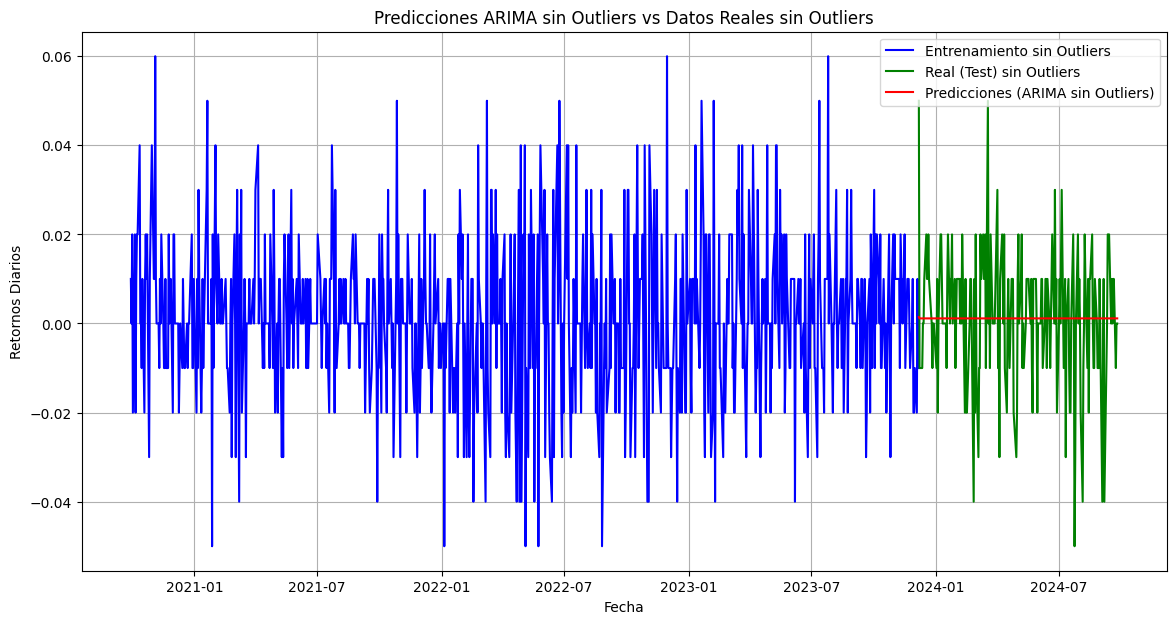

In [ ]:
import matplotlib.pyplot as plt

# Graficar las series temporales
plt.figure(figsize=(14, 7))

# Graficar los datos reales de entrenamiento
plt.plot(train_no_outliers.index, train_no_outliers, label='Entrenamiento sin Outliers', color='blue')

# Graficar los datos reales del conjunto de prueba sin outliers
plt.plot(test_no_outliers.index, test_no_outliers, label='Real (Test) sin Outliers', color='green')

# Graficar las predicciones
plt.plot(predictions_no_outliers.index, predictions_no_outliers, label='Predicciones (ARIMA sin Outliers)', color='red')

# Añadir título y etiquetas
plt.title('Predicciones ARIMA sin Outliers vs Datos Reales sin Outliers')
plt.xlabel('Fecha')
plt.ylabel('Retornos Diarios')
plt.legend()

# Mostrar la gráfica
plt.grid()
plt.show()


Como conclusion de la aplicacion del modelo ARIMA (1,0,1) a los retornos diarios de la accion de Google obtenemos un modleo que no performa bien, aun si excluimos los outliers. Probablemente se deban a que la serie tiene valores muy cercanos a cero. Una alternativa seria transformar la serie a logaritmos, pero no es posiblen dado que tenemos valores negativos.

A continuacion, replicaremos el modelo sobre la serie de precios.

# **Modelo ARIMA de los precios**

### Preparacion y limpieza de los datos con Yahoo Finance, Decomposicion de la serie temporal (EDA)

Los datos son extraidos de Yahoo Finance

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

# Definir el ticker del activo (por ejemplo, GOOGL para Google)
ticker = 'GOOGL'

# Descargar los datos del activo desde Yahoo Finance
precios_googl = yf.download(ticker, start='2021-07-01', end='2024-09-30')

# Mostrar los precios ajustados de cierre (Adj Close)
adj_close = precios_googl['Adj Close']

# Obtener el precio máximo y mínimo
precio_maximo = adj_close.max()
precio_minimo = adj_close.min()

# Mostrar los resultados
print(f'Precio máximo de Adj Close: {precio_maximo}')
print(f'Precio mínimo de Adj Close: {precio_minimo}')


[*********************100%***********************]  1 of 1 completed

Precio máximo de Adj Close: 190.9266357421875
Precio mínimo de Adj Close: 83.22392272949219


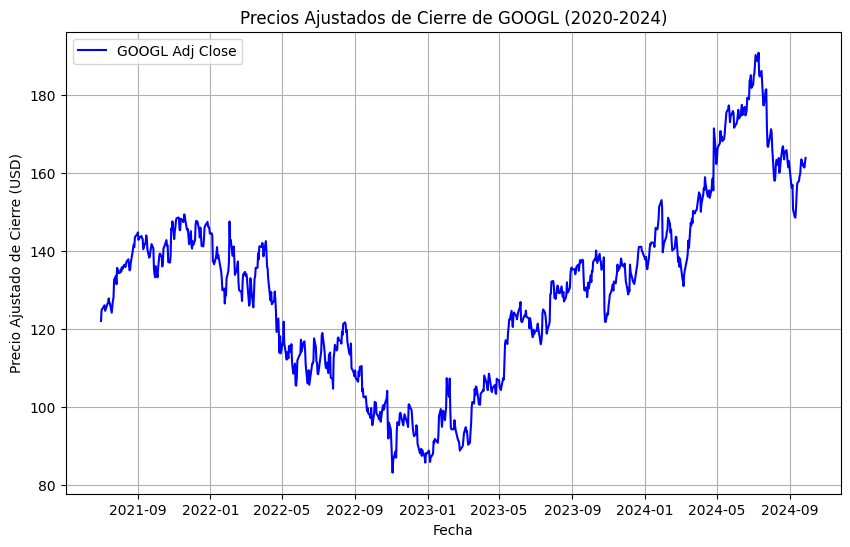

In [ ]:
import matplotlib.pyplot as plt

# Graficar los precios ajustados de cierre
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.plot(adj_close, label='GOOGL Adj Close', color='blue')

# Añadir título y etiquetas
plt.title('Precios Ajustados de Cierre de GOOGL (2020-2024)')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado de Cierre (USD)')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

En el grafico podemos ver los precios de la accion de Google desde Julio de 2021 hasta septiembre de 2024. POdemos ver que hasta principios de enero de 2023 los preiocs tuvieron una tendencia mas bien bajista, probablemente debido a las consecuencias de la recision por el covid a nivel mundial y luego una tendencia alcista hasta la fecha, donde hubo una baja significativa. Seria un bueno goal evaluar si el precio continuaria una senda alcista o bajista.

DETECCION Y ELIMINACION DE DATOS NULOS

In [ ]:
print(adj_close.isnull().sum())  # Para mostrar el número de NaN en cada columna
print(adj_close[adj_close.isnull()])  # Para mostrar las filas que aún contienen NaN


0
Series([], Name: Adj Close, dtype: float64)


In [ ]:
adj_close = adj_close.dropna()


In [ ]:
print(adj_close.isnull().sum())  # Para mostrar el número de NaN en cada columna
print(adj_close[adj_close.isnull()])  # Para mostrar las filas que aún contienen NaN

0
Series([], Name: Adj Close, dtype: float64)


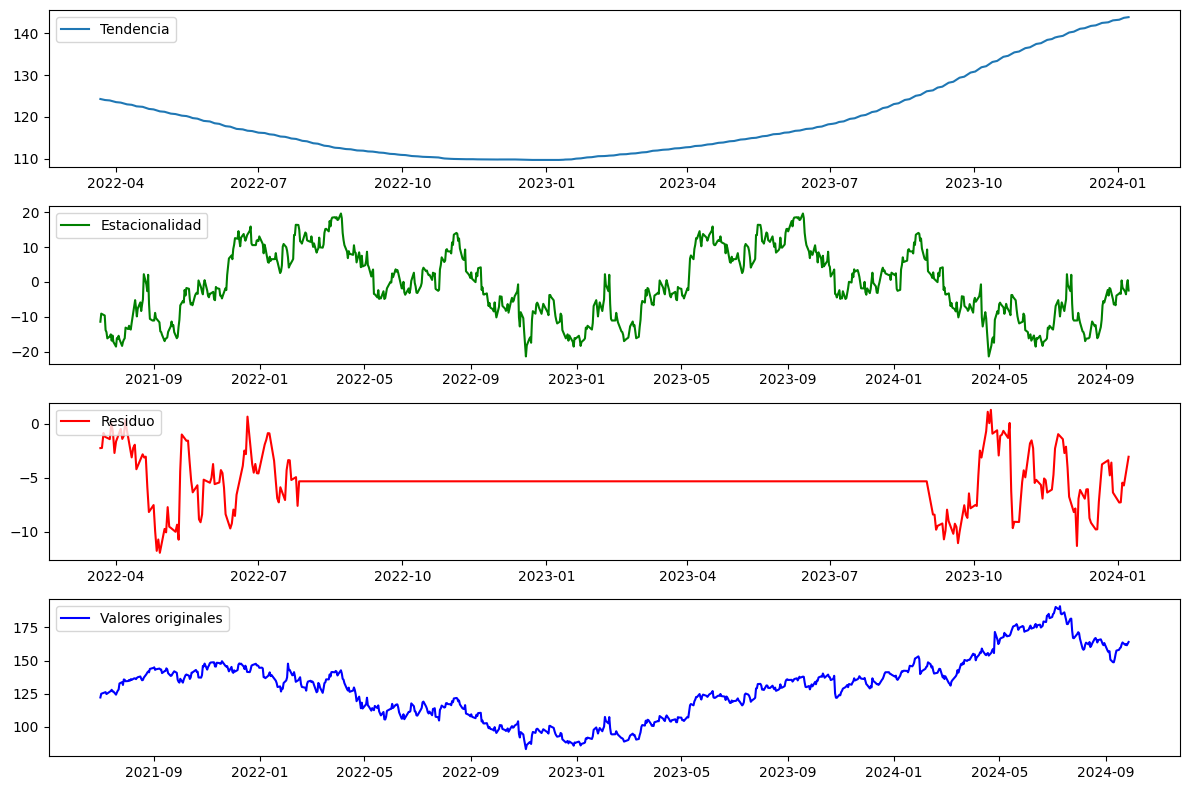

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Asegúrate de que adj_close es tu DataFrame ya cargado y configurado
# adj_close = pd.DataFrame(...)  # Carga tus datos aquí

# Asegurarte de que los datos son de frecuencia diaria
adj_close = adj_close.asfreq('D')

# Eliminar valores nulos (si aún hay, esto es redundante si ya lo hiciste antes)
adj_close = adj_close.dropna()

# Asegúrate de que adj_close sea una serie unidimensional
if isinstance(adj_close, pd.DataFrame):
    adj_close = adj_close.iloc[:, 0]  # Selecciona la primera columna

# Aplicar la descomposición
decompose_result = seasonal_decompose(adj_close, model='additive', period=365)

# Graficar los resultados de la descomposición
plt.figure(figsize=(12, 8))

# Graficar la tendencia
plt.subplot(411)
plt.plot(decompose_result.trend, label='Tendencia')
plt.legend(loc='upper left')

# Graficar la estacionalidad
plt.subplot(412)
plt.plot(decompose_result.seasonal, label='Estacionalidad', color='green')
plt.legend(loc='upper left')

# Graficar el residuo
plt.subplot(413)
plt.plot(decompose_result.resid, label='Residuo', color='red')
plt.legend(loc='upper left')

# Graficar los valores originales
plt.subplot(414)
plt.plot(adj_close, label='Valores originales', color='blue')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Descomponiendo la serie temporal podemos ver que desde enero 2023, la serie compienza una tendencia alcista. La estacionalidad es constante y se mantiene en el tiempo. Los residuos no muestran una gran varicaicon y hay unn periodo que es constante, lo cual habria que investigar


### Division del set de entrenamiento y test

In [ ]:
# ordenamos los datos por fecha
adj_close.sort_index(inplace=True)

# Dividimos el dataset en train y test
train_size = int(len(adj_close) * 0.8)  # Usa el 80% de los datos para entrenar
train, test = adj_close.iloc[:train_size], adj_close.iloc[train_size:]

print(test.tail())
print(train.tail())


Date
2024-09-23    161.850006
2024-09-24    162.289993
2024-09-25    161.490005
2024-09-26    162.729996
2024-09-27    163.949997
Name: Adj Close, dtype: float64
Date
2024-01-29    153.130814
2024-01-30    151.085892
2024-01-31    139.753952
2024-02-01    140.811340
2024-02-02    142.028320
Name: Adj Close, dtype: float64


### Identificar los parámetros del modelo ARIMA (p, d, q)

El modelo ARIMA tiene tres componentes:

p: número de rezagos (lags) de la parte autoregresiva.
d: número de diferencias necesarias para hacer la serie estacionaria.
q: número de rezagos en la parte de media móvil.



*Identificaicon del parametro d*


In [ ]:
#Orden de integracioin adf
from statsmodels.tsa.stattools import adfuller

# Aplicar el test ADF a la columna de retornos
adf_result = adfuller(train,
                  autolag='BIC')

# Imprimir los resultados de ADF
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -1.5625493904316816
p-value: 0.5023738325601654


Dado que el p-value es alto, mayor al nivel de significancia del 5%. Debemos diferenciar para ver si obtenemos un serie estacionaria.

In [ ]:
diff_prices = adj_close.diff().dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test_diff = adfuller(diff_prices)
print('ADF Statistic: %f' % adf_test_diff[0])
print('p-value: %f' % adf_test_diff[1])

ADF Statistic: -28.773875
p-value: 0.000000


Al diferenciar obtenemos una serie estacionaria estadisticamente significativa. POr lo tanto, **d = 1**

*Identificaion de los parametros p y q*

Para determinar estos parámetros, usamos los gráficos ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function) para identificar valores iniciales.

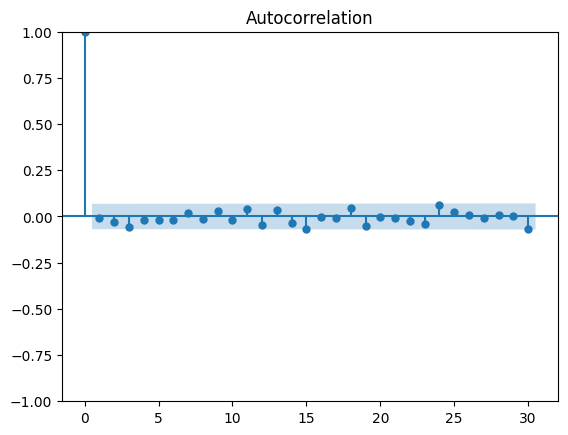

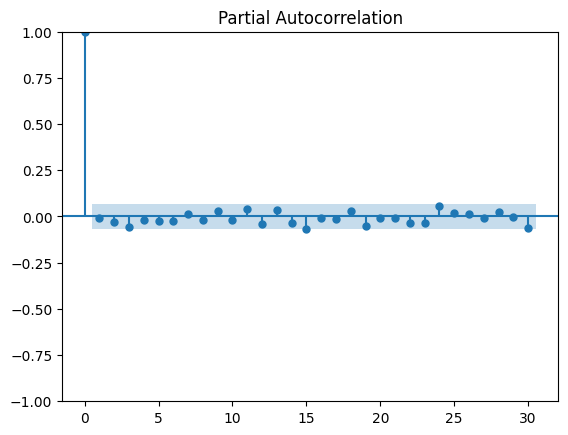

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF
plot_acf(diff_prices)
plot_pacf(diff_prices)
plt.show()

El gráfico ACF muestra la correlación entre la serie temporal y sus rezagos (lags). En este caso, q=1 El gráfico PACF muestra la correlación entre la serie y sus rezagos, eliminando la influencia de los valores intermedios. En este caso, p=1

### Ajuste del modelo ARIMA

In [ ]:

train = train.asfreq('B')  # 'B' significa día hábil


In [ ]:
# Ajustar el modelo ARIMA
model = ARIMA(train, order=(3, 1, 3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  677
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1495.002
Date:                Thu, 17 Oct 2024   AIC                           3004.004
Time:                        17:42:44   BIC                           3035.617
Sample:                    07-01-2021   HQIC                          3016.244
                         - 02-02-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8771      0.094     -9.348      0.000      -1.061      -0.693
ar.L2          0.5574      0.164      3.406      0.001       0.237       0.878
ar.L3          0.8266      0.094      8.828      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Analisis de los residuos

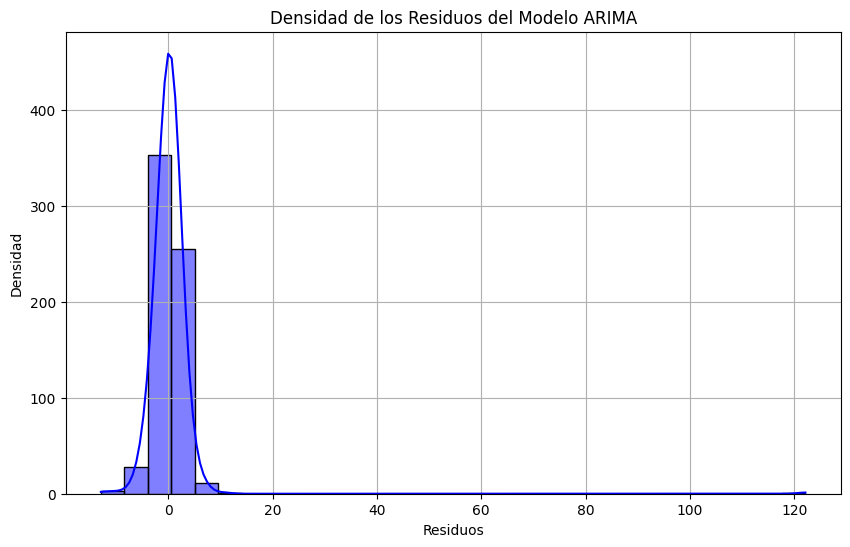

In [ ]:
# Obtener los residuos del modelo ajustado
residuals = model_fit.resid

# Graficar la densidad de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Densidad de los Residuos del Modelo ARIMA')
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

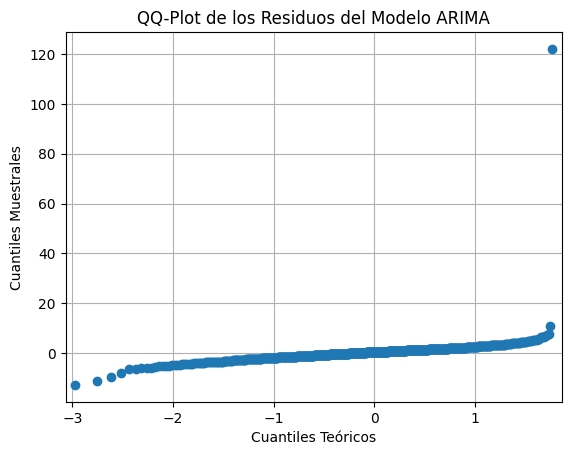

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Obtener los residuos del modelo ajustado
residuals = model_fit.resid

# QQ-Plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('QQ-Plot de los Residuos del Modelo ARIMA')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles Muestrales')
plt.grid()
plt.show()


Grafico de los valores pedichos vs reales

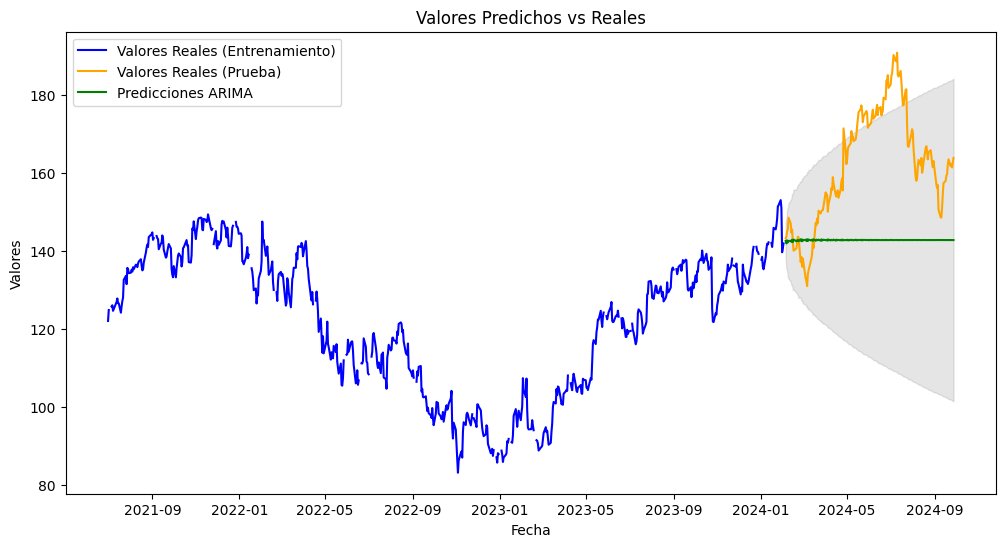

In [ ]:
# Obtener predicciones
# Usar el conjunto de prueba para hacer las predicciones
# Suponiendo que el tamaño de test es conocido
start = len(train)
end = start + len(test) - 1
predictions = model_fit.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Graficar los valores reales y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Valores Reales (Entrenamiento)', color='blue')
plt.plot(test.index, test, label='Valores Reales (Prueba)', color='orange')
plt.plot(test.index, predicted_mean, label='Predicciones ARIMA', color='green')

# Graficar los intervalos de confianza
plt.fill_between(test.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.2)

# Etiquetas y leyenda
plt.title('Valores Predichos vs Reales')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.legend()
plt.show()

Evaluacion del modelo

In [ ]:
# Realizar predicciones en el conjunto de test
predictions = model_fit.forecast(steps=len(test))

# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')

RMSE: 23.872241964074387


In [ ]:
rmse / adj_close.mean()

0.18359630232926186

dado que la relacion entre el rmse y la media de precios historicos es 18%, el modelo no es del todo confiable.

# MODELO GARCH

In [ ]:
# Forecast para los próximos 239 pasos
forecast_results = model_fit.get_forecast(steps=239)  # Predicción a 239 pasos
fc = forecast_results.predicted_mean  # Predicciones
conf = forecast_results.conf_int(alpha=0.05)  # Intervalos de confianza al 95%

# Crear las series de pandas para las predicciones y los intervalos de confianza
# Asegúrate de que el índice de forecast tenga el formato correcto
forecast_index = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=239, freq='B')

fc_series = pd.Series(fc.values, index=forecast_index)
lower_series = pd.Series(conf.iloc[:, 0].values, index=forecast_index)
upper_series = pd.Series(conf.iloc[:, 1].values, index=forecast_index)


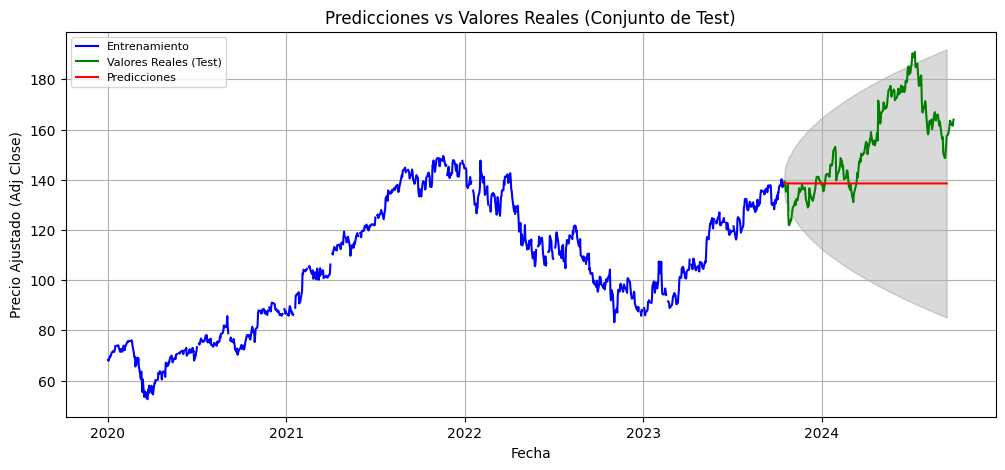

In [ ]:
import matplotlib.pyplot as plt

# Graficar los valores reales de entrenamiento y las predicciones
plt.figure(figsize=(12, 5), dpi=100)

# Graficar el conjunto de entrenamiento
plt.plot(train['Adj Close'], label='Entrenamiento', color='blue')

# Graficar los valores reales del conjunto de test
plt.plot(test['Adj Close'], label='Valores Reales (Test)', color='green')

# Graficar las predicciones
plt.plot(fc_series, label='Predicciones', color='red')

# Graficar el intervalo de confianza
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)

# Añadir título y etiquetas
plt.title('Predicciones vs Valores Reales (Conjunto de Test)')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado (Adj Close)')
plt.legend(loc='upper left', fontsize=8)

# Mostrar la gráfica
plt.grid(True)
plt.show()


In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 40.2 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

# Ajustar un modelo GARCH
garch_model = arch_model(train['Adj Close'], vol='Garch', p=2, q=2)
garch_fit = garch_model.fit()
print(garch_fit.summary())

ModuleNotFoundError: No module named 'arch'

Iteration:      1,   Func. Count:      8,   Neg. LLF: 35463.154777098825
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5648.582211981973
Iteration:      3,   Func. Count:     25,   Neg. LLF: 4072.0307029465866
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4054.5542568768433
Iteration:      5,   Func. Count:     40,   Neg. LLF: 4067.6458373426567
Iteration:      6,   Func. Count:     48,   Neg. LLF: 4048.0739315389596
Iteration:      7,   Func. Count:     56,   Neg. LLF: 4041.1584233362746
Iteration:      8,   Func. Count:     63,   Neg. LLF: 4039.8694564472344
Iteration:      9,   Func. Count:     70,   Neg. LLF: 4036.4324236720245
Iteration:     10,   Func. Count:     77,   Neg. LLF: 4035.6472711485367
Iteration:     11,   Func. Count:     84,   Neg. LLF: 4035.289419470778
Iteration:     12,   Func. Count:     91,   Neg. LLF: 4035.273936130483
Iteration:     13,   Func. Count:     99,   Neg. LLF: 4035.2172143559997
Iteration:     14,   Func. Count:    106,   Neg. LLF: 

<ipython-input-47-95cb6bc9ce85>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuos_estandarizados, color='blue', shade=True)


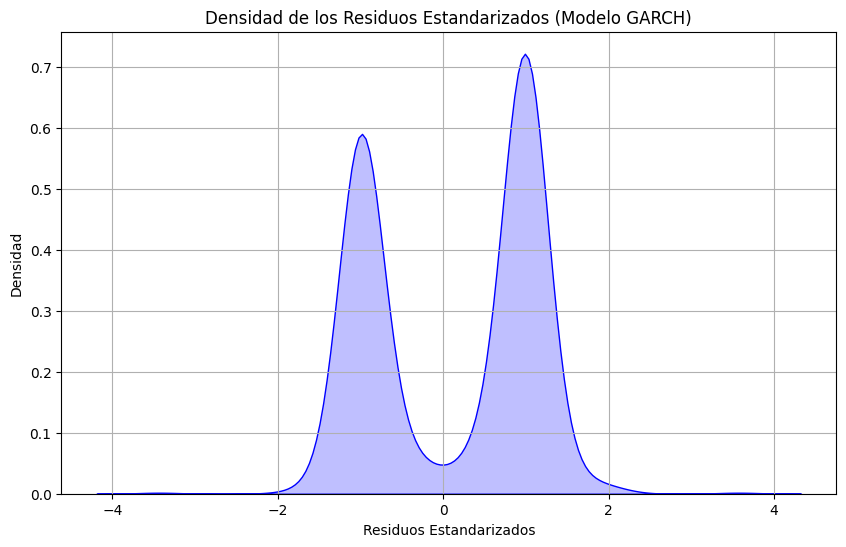

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el modelo GARCH (asumiendo que ya lo has ajustado)
garch_fit = garch_model.fit()

# Obtener los residuos estandarizados
residuos_estandarizados = garch_fit.resid / garch_fit.conditional_volatility

# Graficar la densidad de los residuos estandarizados
plt.figure(figsize=(10, 6))
sns.kdeplot(residuos_estandarizados, color='blue', shade=True)
plt.title('Densidad de los Residuos Estandarizados (Modelo GARCH)')
plt.xlabel('Residuos Estandarizados')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()


Iteration:      1,   Func. Count:      8,   Neg. LLF: 35463.154777098825
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5648.582211981973
Iteration:      3,   Func. Count:     25,   Neg. LLF: 4072.0307029465866
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4054.5542568768433
Iteration:      5,   Func. Count:     40,   Neg. LLF: 4067.6458373426567
Iteration:      6,   Func. Count:     48,   Neg. LLF: 4048.0739315389596
Iteration:      7,   Func. Count:     56,   Neg. LLF: 4041.1584233362746
Iteration:      8,   Func. Count:     63,   Neg. LLF: 4039.8694564472344
Iteration:      9,   Func. Count:     70,   Neg. LLF: 4036.4324236720245
Iteration:     10,   Func. Count:     77,   Neg. LLF: 4035.6472711485367
Iteration:     11,   Func. Count:     84,   Neg. LLF: 4035.289419470778
Iteration:     12,   Func. Count:     91,   Neg. LLF: 4035.273936130483
Iteration:     13,   Func. Count:     99,   Neg. LLF: 4035.2172143559997
Iteration:     14,   Func. Count:    106,   Neg. LLF: 

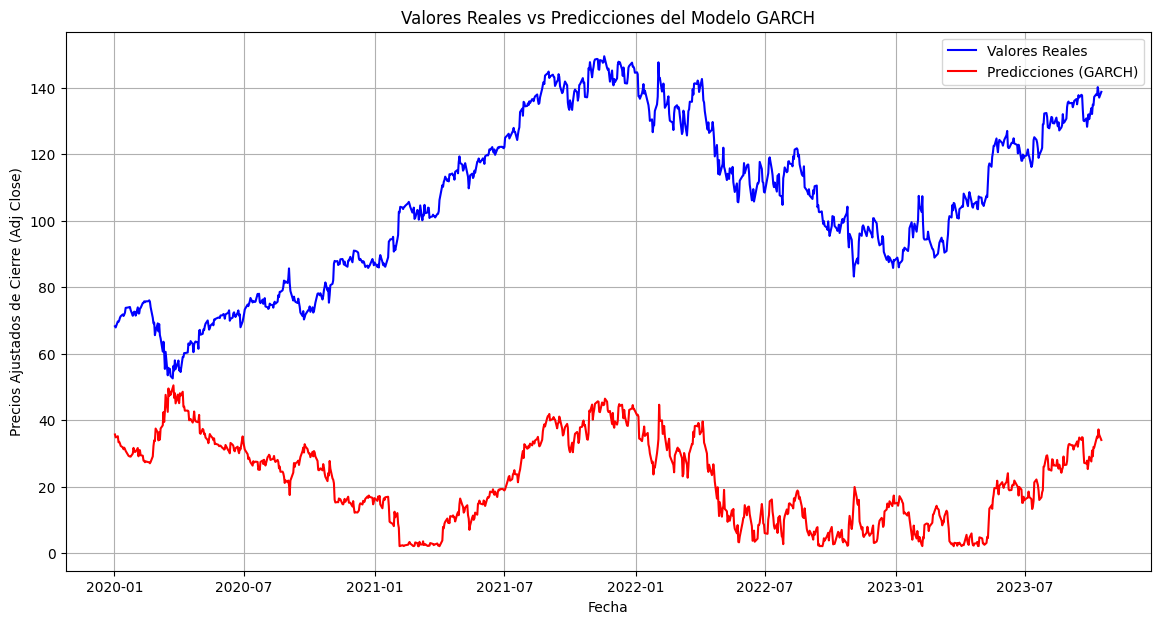

In [ ]:
import matplotlib.pyplot as plt

# Ajustar el modelo GARCH (suponiendo que ya has ajustado el modelo)
garch_fit = garch_model.fit()

# Obtener los valores predichos (retornos condicionales) del modelo GARCH
predicted_volatility = garch_fit.conditional_volatility

# Graficar los valores reales vs los predichos
plt.figure(figsize=(14, 7))

# Graficar los valores reales
plt.plot(train.index, train['Adj Close'], label='Valores Reales', color='blue')

# Graficar los valores predichos por el modelo GARCH
plt.plot(train.index, predicted_volatility, label='Predicciones (GARCH)', color='red')

# Añadir título y etiquetas
plt.title('Valores Reales vs Predicciones del Modelo GARCH')
plt.xlabel('Fecha')
plt.ylabel('Precios Ajustados de Cierre (Adj Close)')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

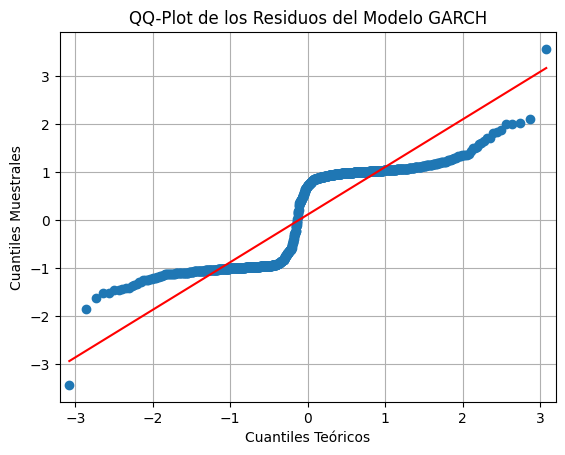

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Supongamos que 'garch_fit' es tu modelo GARCH ajustado
residuals = garch_fit.resid / garch_fit.conditional_volatility  # Residuos estandarizados

# QQ-Plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('QQ-Plot de los Residuos del Modelo GARCH')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles Muestrales')
plt.grid()
plt.show()


Basados en el QQ plot, el modelo GARCH no es apropiado, siendo el ARIMA mas adecuado

# Modelo SVR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
df = yf.download('GOOGL', start='2020-07-01', end='2024-10-22')
df.to_csv('GOOGL.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,70.958504,72.424004,70.709000,72.099998,71.921906,42182000
2020-07-02,72.592003,74.426003,72.553497,73.496498,73.314964,57218000
2020-07-06,74.407501,75.500000,73.848999,74.982498,74.797287,44712000
2020-07-07,74.806503,76.066002,74.485001,74.496002,74.311989,42364000
2020-07-08,75.040001,75.558502,74.614998,75.180000,74.994308,31766000


In [ ]:
forecast_days = 30
df = df[['Close']]
df['Prediction'] = df[['Close']].shift(-forecast_days) #  está creando una nueva columna llamada 'Prediction' en el DataFrame df, que contiene los valores de la columna 'Close', pero desplazados hacia arriba por un número de filas equivalente a forecast_days.

<ipython-input-79-275e4abcf324>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-forecast_days) #  está creando una nueva columna llamada 'Prediction' en el DataFrame df, que contiene los valores de la columna 'Close', pero desplazados hacia arriba por un número de filas equivalente a forecast_days.


In [ ]:
X = np.array(df.drop('Prediction', axis=1))
X = X[:-forecast_days] #  Corta de las variables predictoras los ultimos 30 dias
y = np.array(df['Prediction'])
y = y[:-forecast_days] # los toma

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [ ]:
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8500033063654434


In [ ]:
# Predicciones para el conjunto de prueba
y_pred_test = model.predict(X_test)

# Supongamos que 'forecast_days' es el número de días que deseas pronosticar
# Necesitas construir el conjunto de características para el pronóstico
X_forecast = X[-forecast_days:]  # Las últimas filas de X para el pronóstico
y_forecast = model.predict(X_forecast)  # Predicciones para los días pronosticados


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Predicciones para el conjunto de prueba
y_pred_test = model.predict(X_test)

# Supongamos que 'forecast_days' es el número de días que deseas pronosticar
X_forecast = X[-forecast_days:]  # Las últimas filas de X para el pronóstico
y_forecast = model.predict(X_forecast)  # Predicciones para los días pronosticados

# Fechas correspondientes
dates_test = df.index[-len(y_test):]  # Las fechas para el conjunto de prueba
dates_forecast = df.index[-forecast_days:]  # Las fechas para el pronóstico


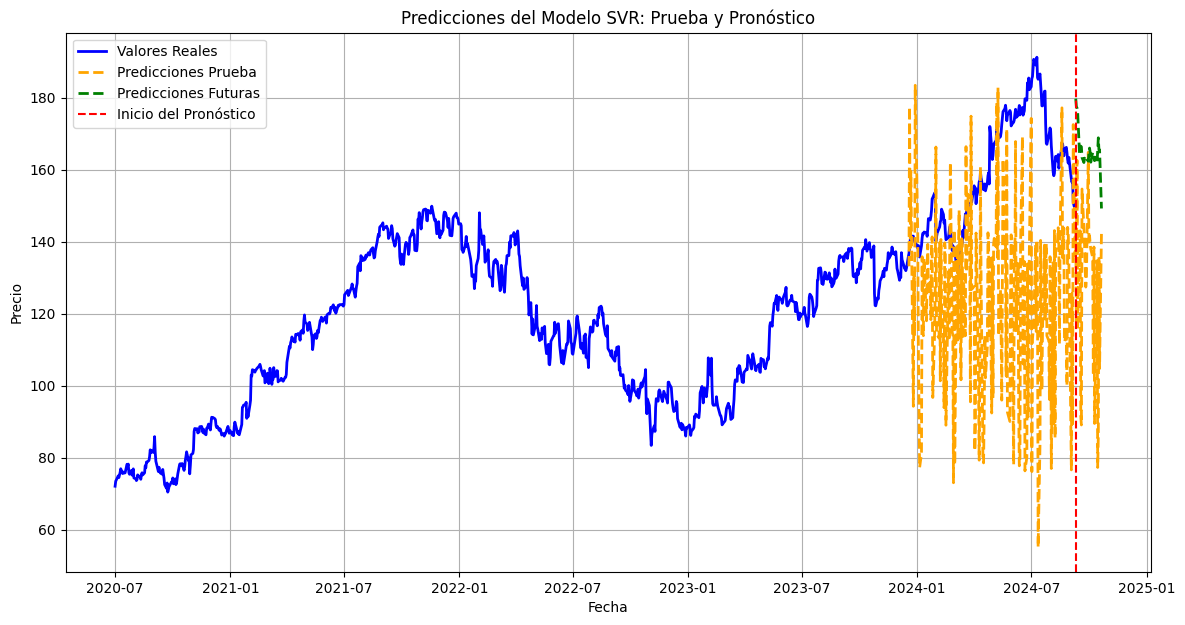

In [ ]:
plt.figure(figsize=(14, 7))

# Graficar valores reales (Close)
plt.plot(df.index[:-forecast_days], df['Close'][:-forecast_days], label='Valores Reales', color='blue', linewidth=2)

# Graficar predicciones del conjunto de prueba
plt.plot(dates_test, y_pred_test, label='Predicciones Prueba', color='orange', linestyle='--', linewidth=2)

# Graficar predicciones futuras
plt.plot(dates_forecast, y_forecast, label='Predicciones Futuras', color='green', linestyle='--', linewidth=2)

# Agregar títulos y etiquetas
plt.title('Predicciones del Modelo SVR: Prueba y Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.axvline(x=df.index[-forecast_days], color='red', linestyle='--', label='Inicio del Pronóstico')  # Línea vertical para indicar el inicio del pronóstico
plt.legend()
plt.grid()
plt.show()


Conclusiones

Luego de probar diversos modelos, no hemos encontrado ninguno que prediga los precios futuros de una forma aceptable para utilizar los modelos en decisiones de trading o mitigacion de riesgos basados en las perspectivas futuras de los precios. De todas formas, podemos ver una tendencia ascendente de los precios en el largo plazo, propio de las acciones en la bolsa a lo largo de la historia. Ademas, vemos que el comportamiento no es homogeneo a pesar de estar relacionado con sus valores pasados.
Dado que la intencion del modelo es predecir los precios de la manera mas acertada posible para realizar operaciones en la bolsa, el proximo paso podria ser la utilizacion de redes neuronales que ademas de considerar la autocorrelacion serial (como los modelos ARIMA), podriamos ir moviendonos en el tiempo, lo que pareceria mas acorde al comportamiento dinamico de los precios. No obstante, lo modelos presentados podrian ser utlizados de base y optimizados.